In [107]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.005, 0.1, 0.015)
axis_std_w2 = np.arange(0.005, 0.1, 0.015)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [108]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[0.88045373 0.22201207 0.12217075 0.0985555  0.07914199]


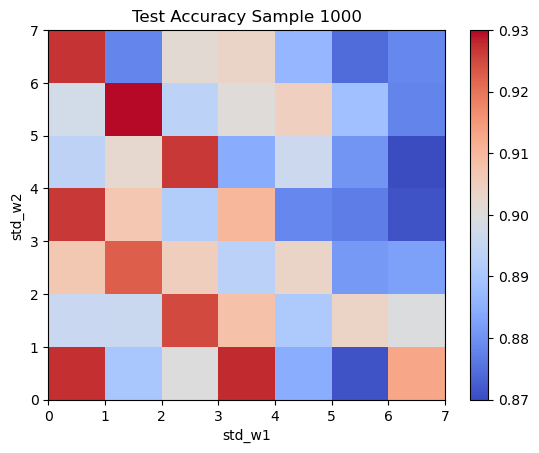

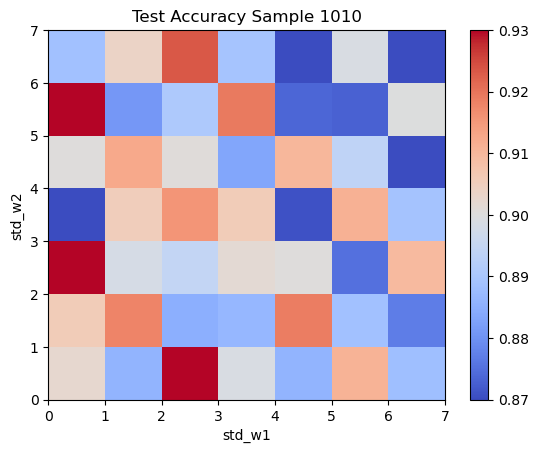

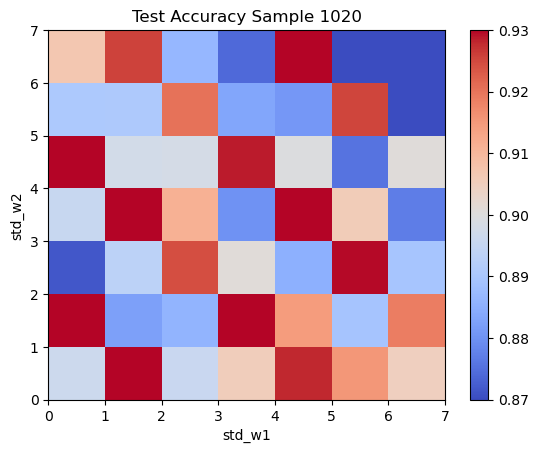

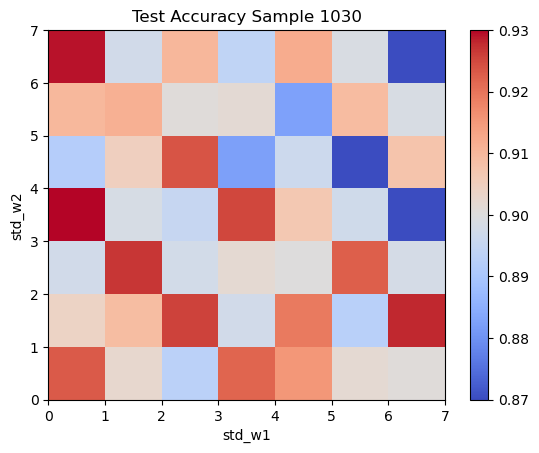

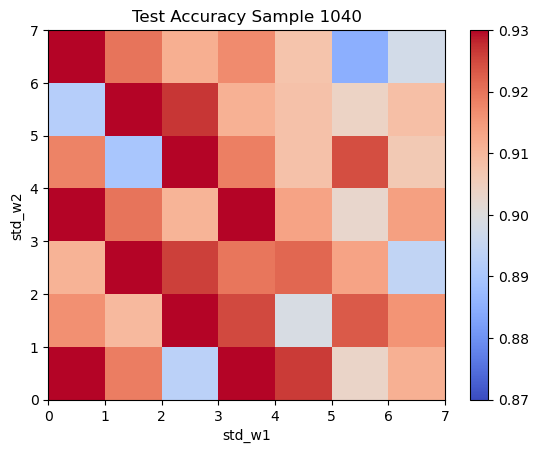

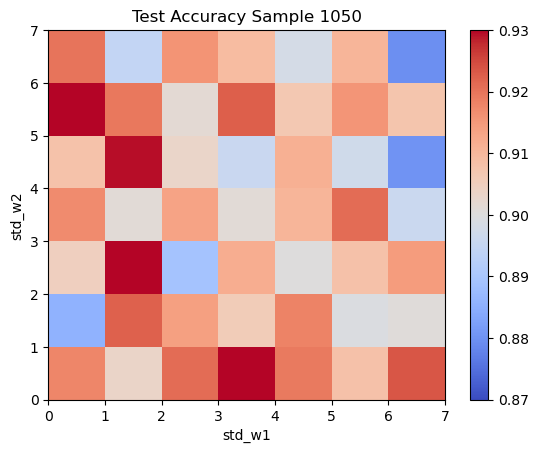

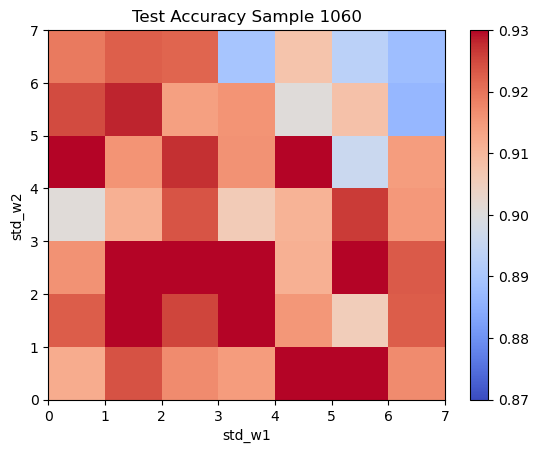

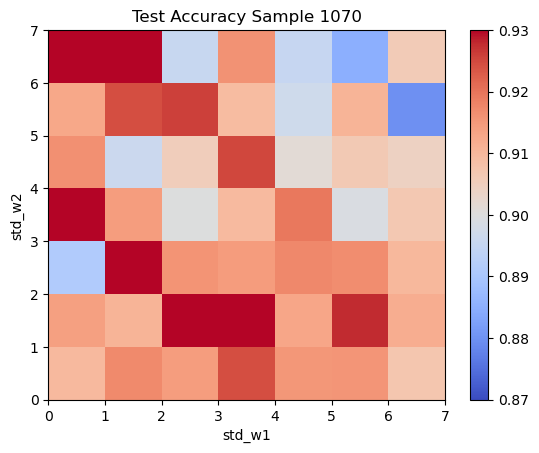

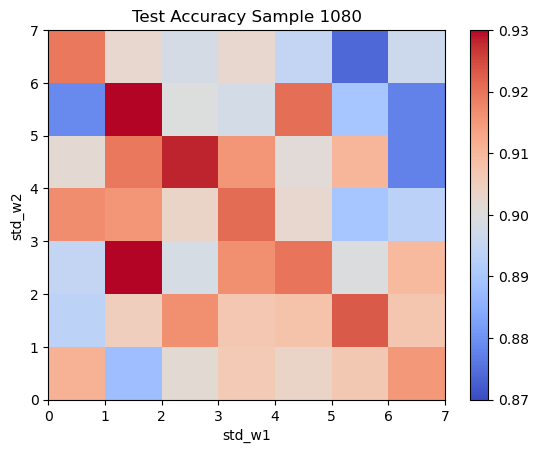

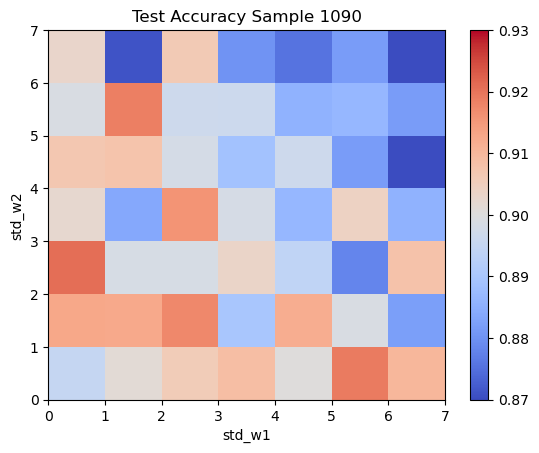

In [109]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(data['test_accuracy_w1_w2'].T, cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]


In [110]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [111]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [112]:
train_accuracy_10_samples.shape

(10, 7, 7)

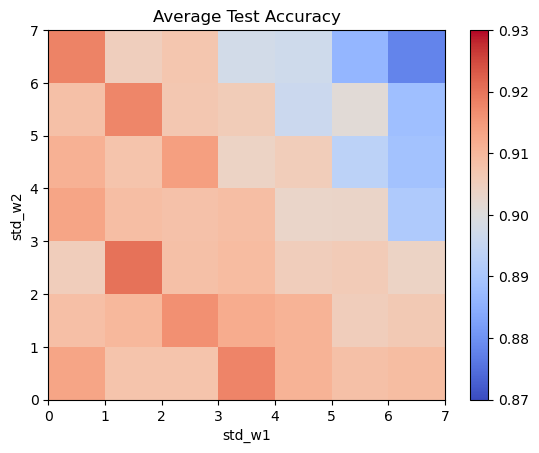

In [113]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_over_10_samples.png".format(sample))

In [114]:
average_train_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_train_accuracy_grid_10_by_10_10_samples)

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [115]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [116]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_train_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_train_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_train_accuracy_grid_10_by_10_10_samples.shape)

In [117]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.91323117, 0.90861378, 0.90517829, 0.91324119, 0.91116787,
        0.90828325, 0.91816907],
       [0.90753205, 0.9098758 , 0.92033253, 0.90876402, 0.907502  ,
        0.91777845, 0.90503806],
       [0.90751202, 0.91633614, 0.90836338, 0.90804287, 0.9141226 ,
        0.90694111, 0.90710136],
       [0.91784856, 0.91208934, 0.90929487, 0.90877404, 0.90388622,
        0.90576923, 0.89754607],
       [0.91085737, 0.91085737, 0.90536859, 0.90310497, 0.90547877,
        0.89604367, 0.89679487],
       [0.90826322, 0.90520833, 0.90588942, 0.90340545, 0.89328926,
        0.90103165, 0.88631811],
       [0.90909455, 0.90638021, 0.90385617, 0.8909355 , 0.88895232,
        0.88820112, 0.8778145 ]])

In [118]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples.T)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [119]:
test_best_w1_w2

(1, 2)

In [120]:
test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005

In [121]:
test_best_w1_best_w2

array([0.0275, 0.0425])

In [122]:
data = {}
data['frequency'] = 65
data['N'] = 200
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_200.npz",**data)